In [1]:
#Import relevant dataframes

In [2]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [4]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
response = requests.get(url)

# TODO: Create a `BeautifulSoup` instance with that data
soup = BeautifulSoup(response.content, "html.parser")

soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [5]:
#Select all books
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [12]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [17]:
#Find title option 1
title = books_html[0].find("img").attrs['alt']
title

'A Light in the Attic'

In [18]:
#Find title option 2
title = books_html[0].find("h3").find("a").attrs["title"]
title

'A Light in the Attic'

In [22]:
#Find price
book_price = float(books_html[0].find("p", class_ = "price_color").string.strip("£"))
book_price

51.77

In [23]:
#Find rating
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [24]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [27]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    rating_dict = {"One"   : 1,
                   "Two"   : 2,
                   "Three" : 3 ,
                   "Four"  : 4,
                  "Five"   : 5}
    return rating_dict[f'{rating_classes[1]}']
    

In [29]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

In [30]:
## Parsing _all_ books

In [32]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

for book in books_html:
    books_dict['Title'].append(book.find("img").attrs['alt'])
    books_dict['Price'].append(float(book.find("p", class_ = "price_color").string.strip("£")))
    books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
    
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [33]:
len(books_dict)         # You should have 3 key:value pairs
len(books_dict["Title"]) # Each value should contain 20 elements from the 20 books, as many as on the web page!

20

# Loading data in Pandas 

In [34]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

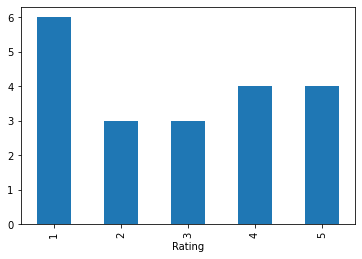

In [35]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.9.8, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/josephgulay/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/josephgulay/code/roadbusta/data-challenges-recap/02-Data-Toolkit/02-Data-Sourcing/02-Scraping
plugins: anyio-3.4.0
collecting ... collected 6 items

tests/test_books.py::TestBooks::test_books_df_columns_name PASSED        [ 16%]
tests/test_books.py::TestBooks::test_books_df_columns_size PASSED        [ 33%]
tests/test_books.py::TestBooks::test_books_dict_id_defined PASSED        [ 50%]
tests/test_books.py::TestBooks::test_first_book_price PASSED             [ 66%]
tests/test_books.py::TestBooks::test_first_book_rating PASSED            [ 83%]
tests/test_books.py::TestBooks::test_first_book_title PASSED             [100%]

============================== 6 passed in 0.84s ===============================


💯 You can commit your code:

git add 

# Going through all the pages of the catalogue

In [39]:
MAX_PAGE = 3
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    # TODO: Use `requests` to do an HTTP request to fetch data located at that URL
    response = requests.get(url)

    # TODO: Create a `BeautifulSoup` instance with that data
    soup = BeautifulSoup(response.content, "html.parser")
    
    books_html = soup.find_all("article", class_="product_pod")
    for book in books_html:
        books_dict['Title'].append(book.find("img").attrs['alt'])
        books_dict['Price'].append(float(book.find("p", class_ = "price_color").string.strip("£")))
        books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
books_dict
    

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas",
  'In Her Wake',
  'How Music Works',
  'Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Smal

In [41]:
len(books_dict["Title"])

60

In [43]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df.tail()

,Title,Price,Rating
55,The Torch Is Passed: A Harding Family Story,19.09,1
56,The Secret of Dreadwillow Carse,56.13,1
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,1
58,The Past Never Ends,56.50,4
59,The Natural History of Us (The Fine Art of Pre...,45.22,3


<AxesSubplot:>

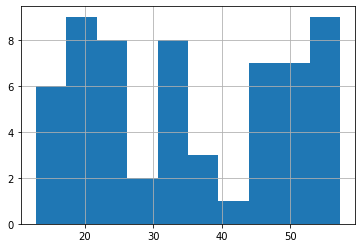

In [45]:
books_df["Price"].hist()

<AxesSubplot:xlabel='Rating'>

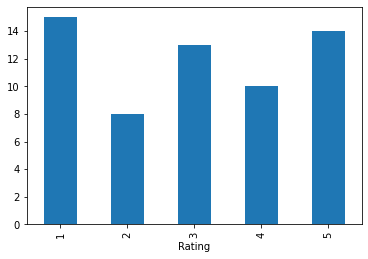

In [46]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [48]:
books_df.to_csv("books.csv")

In [49]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [50]:
books_df.to_excel('books.xlsx', sheet_name='Books')